# Run this Notebook

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/DeepRLCourse/Homework-1-Questions/blob/main/HW1_Notebook.ipynb)  
[![Open in Kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://github.com/DeepRLCourse/Homework-1-Questions/blob/main/HW1_Notebook.ipynb)

# HW1: Introduction to RL
> - Full Name: **Parsa Ghezelbash**
> - Student ID: **401110437**


This notebook is designed to provide hands-on experience with RL modeling, algorithm implementation, and performance evaluation. Students will explore RL concepts through predefined environments and custom-designed settings.

Follow the instructions in each section to complete the homework.

## Setup Instructions
Seting up RL dependecies for first time may be challenging. Some  torch or gymnasium (Sklearn lib in SL world!) environments need additional set up on your system. If you encountered error and failure after hours of search and try, feel free to be in contact with TA's.  Run the following commands to install dependencies before starting the notebook:



In [52]:
!apt-get install x11-utils > /dev/null 2>&1
!pip install pyglet > /dev/null 2>&1
!apt-get install -y xvfb python-opengl > /dev/null 2>&1
!apt-get install xvfb

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
xvfb is already the newest version (2:21.1.4-2ubuntu1.7~22.04.12).
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.


In [53]:
!pip install pyvirtualdisplay > /dev/null 2>&1
!pip install swig > /dev/null 2>&1
!pip install stable-baselines3 "gymnasium[all]" pygame matplotlib seaborn numpy pandas > /dev/null 2>&1

Hamid is CE student who loves learning about RL. He tried to use **Gymnasium** and **Stable-Baselines3** to solve games he played as a kid.  

He started to list the games which was provided in gymnasium library.

In [54]:
from gymnasium import envs

all_envs = envs.registry
env_ids = [env_spec  for env_spec in all_envs]
print("Gymnasium envs listed:",sorted(env_ids))

Gymnasium envs listed: ['Acrobot-v1', 'Ant-v2', 'Ant-v3', 'Ant-v4', 'Ant-v5', 'BipedalWalker-v3', 'BipedalWalkerHardcore-v3', 'Blackjack-v1', 'CarRacing-v3', 'CartPole-v0', 'CartPole-v1', 'CliffWalking-v0', 'FrozenLake-v1', 'FrozenLake8x8-v1', 'GymV21Environment-v0', 'GymV26Environment-v0', 'HalfCheetah-v2', 'HalfCheetah-v3', 'HalfCheetah-v4', 'HalfCheetah-v5', 'Hopper-v2', 'Hopper-v3', 'Hopper-v4', 'Hopper-v5', 'Humanoid-v2', 'Humanoid-v3', 'Humanoid-v4', 'Humanoid-v5', 'HumanoidStandup-v2', 'HumanoidStandup-v4', 'HumanoidStandup-v5', 'InvertedDoublePendulum-v2', 'InvertedDoublePendulum-v4', 'InvertedDoublePendulum-v5', 'InvertedPendulum-v2', 'InvertedPendulum-v4', 'InvertedPendulum-v5', 'LunarLander-v3', 'LunarLanderContinuous-v3', 'MountainCar-v0', 'MountainCarContinuous-v0', 'Pendulum-v1', 'Pusher-v2', 'Pusher-v4', 'Pusher-v5', 'Reacher-v2', 'Reacher-v4', 'Reacher-v5', 'Swimmer-v2', 'Swimmer-v3', 'Swimmer-v4', 'Swimmer-v5', 'Taxi-v3', 'Walker2d-v2', 'Walker2d-v3', 'Walker2d-v4', 'W

Then He selected Mountain Car Game to work with:

In [55]:
import gymnasium as gym
env = gym.make("MountainCar-v0", render_mode="rgb_array", goal_velocity=0.1)

print("Action Space {}".format(env.action_space))
print("State Space {}".format(env.observation_space))

print("Action Example: {}".format(env.action_space.sample()))
print("State Example: {}".format(env.observation_space.sample()))

Action Space Discrete(3)
State Space Box([-1.2  -0.07], [0.6  0.07], (2,), float32)
Action Example: 2
State Example: [0.0783528  0.04977676]


Hamid wanted to visualize the env for better understandig of gym envs. He had two options:


1.   rendering inside the colab
2.   rendering as video file



For ploting the game **inside** the colab he used **pyvirtualdisplay** package:

In [56]:
from pyvirtualdisplay import Display
import numpy as np
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay

display = Display(visible=0, size=(400, 300))
display.start()

So He started modify the code to learn how action works and plot it. He selected action of

 *`2: Accelerate to the right`*

For every state of car.

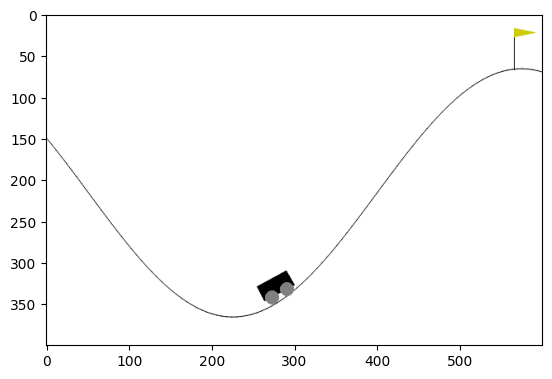

In [57]:
env.reset()
prev_screen = env.render( )
plt.imshow(prev_screen)

for i in range(40):
  # action = env.action_space.sample()  # Random action
  action = 2 # Action Hamid modified to practice
  obs, reward, terminated, truncated, info = env.step(action)
  screen = env.render()

  plt.imshow(screen)
  ipythondisplay.clear_output(wait=True)
  ipythondisplay.display(plt.gcf())

  if terminated:
    break

ipythondisplay.clear_output(wait=True)
env.close()

But for saving game as **video** he defined a function (it's okay if you don't understand just try to run the code and see the output, then try to modify envs!):

In [58]:
import logging
from gymnasium.wrappers import RecordEpisodeStatistics, RecordVideo

training_period = 250  # record the agent's episode every 250
num_training_episodes = 1000  # total number of training episodes

env = gym.make("MountainCar-v0", render_mode="rgb_array")
env = RecordVideo(env, video_folder="MountainCar-v0-agent", name_prefix="training",
                  episode_trigger=lambda x: x % training_period == 0)
env = RecordEpisodeStatistics(env)

for episode_num in range(num_training_episodes):
    obs, info = env.reset()

    episode_over = False
    while not episode_over:
        action = env.action_space.sample()  # replace with actual agent
        obs, reward, terminated, truncated, info = env.step(action)

        episode_over = terminated or truncated

    logging.info(f"episode-{episode_num}", info["episode"])
env.close()

/usr/local/lib/python3.11/dist-packages/moviepy/config_defaults.py:1: DeprecationWarning: invalid escape sequence '\P'
  """


The videos are in MountainCar-v0-agent folder of your colab folder.

But the car couldn't reach the goal state on top of the right hill. So he tried to implement RL algorithm for learning it

In [59]:
from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env

# Parallel environments can bet set but Hamid set 1 env
vec_env = make_vec_env("MountainCar-v0", n_envs=1)

model = PPO("MlpPolicy", vec_env, verbose=1)
model.learn(total_timesteps=25000)
model.save("ppo_MountainCar")

del model # remove to demonstrate saving and loading


/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Using cpu device
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 200      |
|    ep_rew_mean     | -200     |
| time/              |          |
|    fps             | 1047     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 2048     |
---------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 200        |
|    ep_rew_mean          | -200       |
| time/                   |            |
|    fps                  | 746        |
|    iterations           | 2          |
|    time_elapsed         | 5          |
|    total_timesteps      | 4096       |
| train/                  |            |
|    approx_kl            | 0.00874098 |
|    clip_fraction        | 0.00151    |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.1       |
|    explained_variance   | -0.00144   |
|    learning_rate        | 

**Loading saved model**

After training model using PPO and saving it, Hamid started to load the model with the name he saved in cell above:

In [60]:
model = PPO.load("ppo_MountainCar")

obs = vec_env.reset()
while True:
    action, _states = model.predict(obs)
    obs, rewards, dones, info = vec_env.step(action)
    print(obs, rewards, dones, info)
    if dones[0]:
      break

[[-4.4358733e-01  4.0863737e-04]] [-1.] [False] [{'TimeLimit.truncated': False}]
[[-4.4377303e-01 -1.8570265e-04]] [-1.] [False] [{'TimeLimit.truncated': False}]
[[-0.4445517  -0.00077869]] [-1.] [False] [{'TimeLimit.truncated': False}]
[[-0.44591773 -0.001366  ]] [-1.] [False] [{'TimeLimit.truncated': False}]
[[-0.44686106 -0.00094335]] [-1.] [False] [{'TimeLimit.truncated': False}]
[[-0.44837487 -0.00151381]] [-1.] [False] [{'TimeLimit.truncated': False}]
[[-0.4504481  -0.00207322]] [-1.] [False] [{'TimeLimit.truncated': False}]
[[-0.45406556 -0.00361745]] [-1.] [False] [{'TimeLimit.truncated': False}]
[[-0.45920074 -0.00513518]] [-1.] [False] [{'TimeLimit.truncated': False}]
[[-0.46481588 -0.00561516]] [-1.] [False] [{'TimeLimit.truncated': False}]
[[-0.47186965 -0.00705375]] [-1.] [False] [{'TimeLimit.truncated': False}]
[[-0.4783098  -0.00644017]] [-1.] [False] [{'TimeLimit.truncated': False}]
[[-0.4840886  -0.00577879]] [-1.] [False] [{'TimeLimit.truncated': False}]
[[-0.49116302

# **Task 1: Solving Predefined Environments (45 points)**
1.1. Choose two environments from the list which are implemented by  other developers and communities and train RL agents using stable-baselines3. Don't forget to check workshop notebook.

**Environments:**
- [CartPole](https://gymnasium.farama.org/environments/classic_control/cart_pole/)
- [FrozenLake](https://gymnasium.farama.org/environments/toy_text/frozen_lake/)
- [Taxi](https://gymnasium.farama.org/environments/toy_text/taxi/)
- Flappy Bird (Custom env which you can google it)

📊 1.2. Algorithm Comparison:


 Compare RL algorithms and results (at least two algorithms e.g., PPO, DQN) based on:
- Total reward over time
- Hyperparameters (check the docs)


Env1 implementation. [ place for your code ]




In [61]:
import gymnasium as gym
from gymnasium import Wrapper, RewardWrapper
from stable_baselines3 import PPO, DQN
from stable_baselines3.common.callbacks import BaseCallback
import matplotlib.pyplot as plt
import time
import numpy as np
from itertools import product
from sklearn.model_selection import ParameterGrid

class EpisodeTracker(Wrapper):
    def __init__(self, env):
        super().__init__(env)
        self.episode_rewards = []
        self.episode_lengths = []
        self.current_episode_reward = 0
        self.current_episode_length = 0

    def step(self, action):
        obs, reward, terminated, truncated, info = super().step(action)
        self.current_episode_reward += reward
        self.current_episode_length += 1
        if terminated or truncated:
            self.episode_rewards.append(self.current_episode_reward)
            self.episode_lengths.append(self.current_episode_length)
            self.current_episode_reward = 0
            self.current_episode_length = 0
        return obs, reward, terminated, truncated, info

    def get_episode_rewards(self):
        return self.episode_rewards

    def get_episode_lengths(self):
        return self.episode_lengths


class MetricsCollectorCallback(BaseCallback):
    def __init__(self, verbose=0):
        super().__init__(verbose)
        self.episode_rewards = []
        self.episode_lengths = []
        self.timesteps = []
        self.last_episode_count = 0

    def _on_step(self) -> bool:
        vec_env = self.model.get_env()
        env = vec_env.envs[0].env
        if isinstance(env, EpisodeTracker):
            current_episode_count = len(env.get_episode_rewards())
            if current_episode_count > self.last_episode_count:
                new_episodes = current_episode_count - self.last_episode_count
                ep_rewards = env.get_episode_rewards()[self.last_episode_count:]
                ep_lengths = env.get_episode_lengths()[self.last_episode_count:]

                self.episode_rewards.append(np.mean(ep_rewards))
                self.episode_lengths.append(np.mean(ep_lengths))
                self.timesteps.append(self.num_timesteps)
                self.last_episode_count = current_episode_count
        return True

def train_hyperparams(model_class, param_grid, use_custom_reward=False, total_timesteps=20000):
    results = []
    grid = ParameterGrid(param_grid)

    for idx, params in enumerate(grid):
        print(f"\nTraining combination {idx+1}/{len(grid)}")
        print(params)

        env = create_env(use_custom_reward)
        callback = MetricsCollectorCallback()

        model = model_class('MlpPolicy', env, verbose=0, **params)
        model.learn(total_timesteps=total_timesteps, callback=callback)

        results.append({
            'params': params,
            'rewards': callback.episode_rewards,
            'lengths': callback.episode_lengths,
            'timesteps': callback.timesteps
        })

    return results

# def plot_hyperparam_results(results, base_title):
#     plt.figure(figsize=(12, 6))
#     cmap = plt.get_cmap('tab20')

#     for i, result in enumerate(results):
#         title = base_title + " ".join([f"{k}: {v}" for k,v in result['params'].items()])
#         plt.plot(result['timesteps'], result['rewards'], color=cmap(i/len(results)), alpha=0.7)
#         plt.xlabel('Timesteps')
#         plt.ylabel('Mean Episode Reward')
#         plt.title(title)
#         plt.tight_layout()
#         plt.show()
#         title = base_title + " ".join([f"{k}: {v}" for k,v in result['params'].items()])
#         plt.plot(result['timesteps'], result['lengths'], color=cmap(i/len(results)), alpha=0.7)
#         plt.xlabel('Timesteps')
#         plt.ylabel('Mean Episode Length')
#         plt.title(title)
#         plt.tight_layout()
#         plt.show()

def plot_hyperparam_results(results, base_title):
    plt.figure(figsize=(12, 12))
    cmap = plt.get_cmap('tab20')

    ax1 = plt.subplot(2, 1, 1)
    ax2 = plt.subplot(2, 1, 2)

    handles = []
    labels = []

    for i, result in enumerate(results):
        color = cmap(i/len(results))
        label = ", ".join([f"{k}:{v}" for k, v in result['params'].items()])

        line1, = ax1.plot(result['timesteps'], result['rewards'],
                         color=color, alpha=0.7)

        line2, = ax2.plot(result['timesteps'], result['lengths'],
                         color=color, alpha=0.7)

        handles.append(line1)
        labels.append(label)

    ax1.set_xlabel('Timesteps')
    ax1.set_ylabel('Mean Episode Reward')
    ax1.set_title(f'{base_title} - Reward')
    ax1.grid(True)

    ax2.set_xlabel('Timesteps')
    ax2.set_ylabel('Mean Episode Length')
    ax2.set_title(f'{base_title} - Length')
    ax2.grid(True)

    plt.figlegend(handles, labels, loc='upper center', ncol=2, bbox_to_anchor=(0.5, 1.05))

    plt.tight_layout()
    plt.show()

def get_best_run(results):
    best_max_reward = -np.inf
    best_run = None
    for result in results:
        if not result['rewards']:
            continue
        max_reward = max(result['rewards'])
        if max_reward > best_max_reward:
            best_max_reward = max_reward
            best_run = result
    return best_run

def compare_best_runs(results_sets, labels):
    plt.figure(figsize=(10, 6))
    for results, label in zip(results_sets, labels):
        best_run = max(results, key=lambda x: np.max(x['rewards']))
        plt.plot(best_run['timesteps'], best_run['rewards'], label=label)
    plt.xlabel('Timesteps')
    plt.ylabel('Mean Episode Reward')
    plt.title('Best Run Comparison')
    plt.axhline(y=8, color='r', linestyle='--', label='Solved Threshold')
    plt.legend()
    plt.show()

def analyze_convergence(results, window=100, threshold=8):
    for result in results:
        rewards = result['rewards']
        if len(rewards) < window:
            continue
        rolling_avg = np.convolve(rewards, np.ones(window)/window, mode='valid')
        converged = np.any(rolling_avg >= threshold)
        print(f"Params: {result['params']}")
        print(f"Max reward: {np.max(rewards):.2f}")
        print(f"Converged: {'Yes' if converged else 'No'}")
        print("-" * 50)

In [ ]:
def create_env(use_custom_reward=False):
    env = gym.make('CartPole-v1')
    if use_custom_reward:
        env = CustomRewardWrapper(env)
    env = EpisodeTracker(env)
    return env

class CustomRewardWrapper(RewardWrapper):
    def __init__(self, env):
        super().__init__(env)

    def reward(self, reward):
        obs = self.env.unwrapped.state
        if obs is None:
            obs = self.env.unwrapped._get_obs()

        pole_angle = obs[2]
        return reward - 0.1 * abs(pole_angle)

ppo_params = {
    'learning_rate': [3e-4, 1e-3],
    'n_steps': [2048, 1024, 512],
    'gamma': [0.95, 0.99],
    'clip_range': [0.1, 0.3]
}

dqn_params = {
    'learning_rate': [3e-4, 1e-3],
    'buffer_size': [10000, 50000],
    'exploration_final_eps': [0.01, 0.1],
    'target_update_interval': [100, 500]
}

# ppo_params = {
#     'learning_rate': [3e-4],
#     'n_steps': [2048],
#     'gamma': [0.95],
#     'clip_range': [0.1]
# }

# dqn_params = {
#     'learning_rate': [3e-4],
#     'buffer_size': [10000],
#     'exploration_final_eps': [0.01],
#     'target_update_interval': [100]
# }

ppo_results = train_hyperparams(PPO, ppo_params)
dqn_results = train_hyperparams(DQN, dqn_params)

ppo_results_mod = train_hyperparams(PPO, ppo_params, use_custom_reward=True)
dqn_results_mod = train_hyperparams(DQN, dqn_params, use_custom_reward=True)

plot_hyperparam_results(ppo_results, 'PPO ')
plot_hyperparam_results(ppo_results_mod, 'PPO Modified ')
plot_hyperparam_results(dqn_results, 'DQN ')
plot_hyperparam_results(dqn_results_mod, 'DQN Modified ')

print("\nPPO Standard Convergence Analysis:")
analyze_convergence(ppo_results)
print("\nPPO Modified Convergence Analysis:")
analyze_convergence(ppo_results_mod)
print("\nDQN Standard Convergence Analysis:")
analyze_convergence(dqn_results)
print("\nDQN Modified Convergence Analysis:")
analyze_convergence(dqn_results_mod)

compare_best_runs(
    [ppo_results, ppo_results_mod, dqn_results, dqn_results_mod],
    ['PPO Standard', 'PPO Modified', 'DQN Standard', 'DQN Modified']
)


Training combination 1/24
{'clip_range': 0.1, 'gamma': 0.95, 'learning_rate': 0.0003, 'n_steps': 2048}

Training combination 2/24
{'clip_range': 0.1, 'gamma': 0.95, 'learning_rate': 0.0003, 'n_steps': 1024}

Training combination 3/24
{'clip_range': 0.1, 'gamma': 0.95, 'learning_rate': 0.0003, 'n_steps': 512}

Training combination 4/24
{'clip_range': 0.1, 'gamma': 0.95, 'learning_rate': 0.001, 'n_steps': 2048}

Training combination 5/24
{'clip_range': 0.1, 'gamma': 0.95, 'learning_rate': 0.001, 'n_steps': 1024}

Training combination 6/24
{'clip_range': 0.1, 'gamma': 0.95, 'learning_rate': 0.001, 'n_steps': 512}

Training combination 7/24
{'clip_range': 0.1, 'gamma': 0.99, 'learning_rate': 0.0003, 'n_steps': 2048}

Training combination 8/24
{'clip_range': 0.1, 'gamma': 0.99, 'learning_rate': 0.0003, 'n_steps': 1024}

Training combination 9/24
{'clip_range': 0.1, 'gamma': 0.99, 'learning_rate': 0.0003, 'n_steps': 512}

Training combination 10/24
{'clip_range': 0.1, 'gamma': 0.99, 'learni

In [ ]:
ppo_standard_best = get_best_run(ppo_results)
ppo_mod_best = get_best_run(ppo_results_mod)
dqn_standard_best = get_best_run(dqn_results)
dqn_mod_best = get_best_run(dqn_results_mod)

best_ppo = max([ppo_standard_best, ppo_mod_best], key=lambda x: max(x['rewards']) if ppo_standard_best and ppo_mod_best else None)
best_dqn = max([dqn_standard_best, dqn_mod_best], key=lambda x: max(x['rewards']) if dqn_standard_best and dqn_mod_best else None)

print("PPO Best (Standard) Max Reward:", max(ppo_standard_best['rewards']) if ppo_standard_best else "N/A")
print("PPO Best (Modified) Max Reward:", max(ppo_mod_best['rewards']) if ppo_mod_best else "N/A")
print("DQN Best (Standard) Max Reward:", max(dqn_standard_best['rewards']) if dqn_standard_best else "N/A")
print("DQN Best (Modified) Max Reward:", max(dqn_mod_best['rewards']) if dqn_mod_best else "N/A")

if best_ppo and best_dqn:
    print("\nOverall Best PPO Reward:", max(best_ppo['rewards']))
    print("Overall Best DQN Reward:", max(best_dqn['rewards']))

Env2 implementation. [ place for your code ]

In [ ]:
def create_env(use_custom_reward=False):
    env = gym.make('Taxi-v3')
    if use_custom_reward:
        env = CustomRewardWrapper(env)
    env = EpisodeTracker(env)
    return env

class CustomRewardWrapper(RewardWrapper):
    def __init__(self, env):
        super().__init__(env)
        self.last_obs = None

    def step(self, action):
        obs, reward, terminated, truncated, info = self.env.step(action)
        self.last_obs = obs
        modified_reward = self.reward(reward)
        return obs, modified_reward, terminated, truncated, info

    def reward(self, reward):
        if self.last_obs is not None:
            taxi_row, taxi_col, pass_loc, dest_idx = self.env.unwrapped.decode(self.last_obs)

            distance_penalty = 0.0
            bonus = 0.0

            if pass_loc == 4:
                dest_row, dest_col = self.env.unwrapped.locs[dest_idx]
                distance = abs(taxi_row - dest_row) + abs(taxi_col - dest_col)
                distance_penalty = -0.1 * distance

            if reward == 20:
                bonus = 2.0

            return reward + distance_penalty + bonus
        return reward

ppo_params = {
    'learning_rate': [3e-4, 1e-3],
    'n_steps': [2048, 1024, 512],
    'gamma': [0.95, 0.99],
    'clip_range': [0.1, 0.3]
}

dqn_params = {
    'learning_rate': [3e-4, 1e-3],
    'buffer_size': [10000, 50000],
    'exploration_final_eps': [0.01, 0.1],
    'target_update_interval': [100, 500]
}

# ppo_params = {
#     'learning_rate': [3e-4],
#     'n_steps': [2048],
#     'gamma': [0.95],
#     'clip_range': [0.1]
# }

# dqn_params = {
#     'learning_rate': [3e-4],
#     'buffer_size': [10000],
#     'exploration_final_eps': [0.01],
#     'target_update_interval': [100]
# }

ppo_results = train_hyperparams(PPO, ppo_params)
dqn_results = train_hyperparams(DQN, dqn_params)

ppo_results_mod = train_hyperparams(PPO, ppo_params, use_custom_reward=True)
dqn_results_mod = train_hyperparams(DQN, dqn_params, use_custom_reward=True)

plot_hyperparam_results(ppo_results, 'PPO ')
plot_hyperparam_results(ppo_results_mod, 'PPO Modified ')
plot_hyperparam_results(dqn_results, 'DQN ')
plot_hyperparam_results(dqn_results_mod, 'DQN Modified ')

print("\nPPO Standard Convergence Analysis:")
analyze_convergence(ppo_results)
print("\nPPO Modified Convergence Analysis:")
analyze_convergence(ppo_results_mod)
print("\nDQN Standard Convergence Analysis:")
analyze_convergence(dqn_results)
print("\nDQN Modified Convergence Analysis:")
analyze_convergence(dqn_results_mod)


compare_best_runs(
    [ppo_results, ppo_results_mod, dqn_results, dqn_results_mod],
    ['PPO Standard', 'PPO Modified', 'DQN Standard', 'DQN Modified']
)

In [ ]:
ppo_standard_best = get_best_run(ppo_results)
ppo_mod_best = get_best_run(ppo_results_mod)
dqn_standard_best = get_best_run(dqn_results)
dqn_mod_best = get_best_run(dqn_results_mod)

best_ppo = max([ppo_standard_best, ppo_mod_best], key=lambda x: max(x['rewards']) if ppo_standard_best and ppo_mod_best else None)
best_dqn = max([dqn_standard_best, dqn_mod_best], key=lambda x: max(x['rewards']) if dqn_standard_best and dqn_mod_best else None)

print("PPO Best (Standard) Max Reward:", max(ppo_standard_best['rewards']) if ppo_standard_best else "N/A")
print("PPO Best (Modified) Max Reward:", max(ppo_mod_best['rewards']) if ppo_mod_best else "N/A")
print("DQN Best (Standard) Max Reward:", max(dqn_standard_best['rewards']) if dqn_standard_best else "N/A")
print("DQN Best (Modified) Max Reward:", max(dqn_mod_best['rewards']) if dqn_mod_best else "N/A")

if best_ppo and best_dqn:
    print("\nOverall Best PPO Reward:", max(best_ppo['rewards']))
    print("Overall Best DQN Reward:", max(best_dqn['rewards']))

Write a wrapper for changing reward function and plot the changes. (Bonus)

In [ ]:
# Bonus TODO's: Your wrapper for reward function

# **Task 2: Creating Custom Environment (45 points)**
In this question, you are required to model **a custom 4*4 gridworld problem** as Markov Decision Processes (MDPs). You must define the following components:

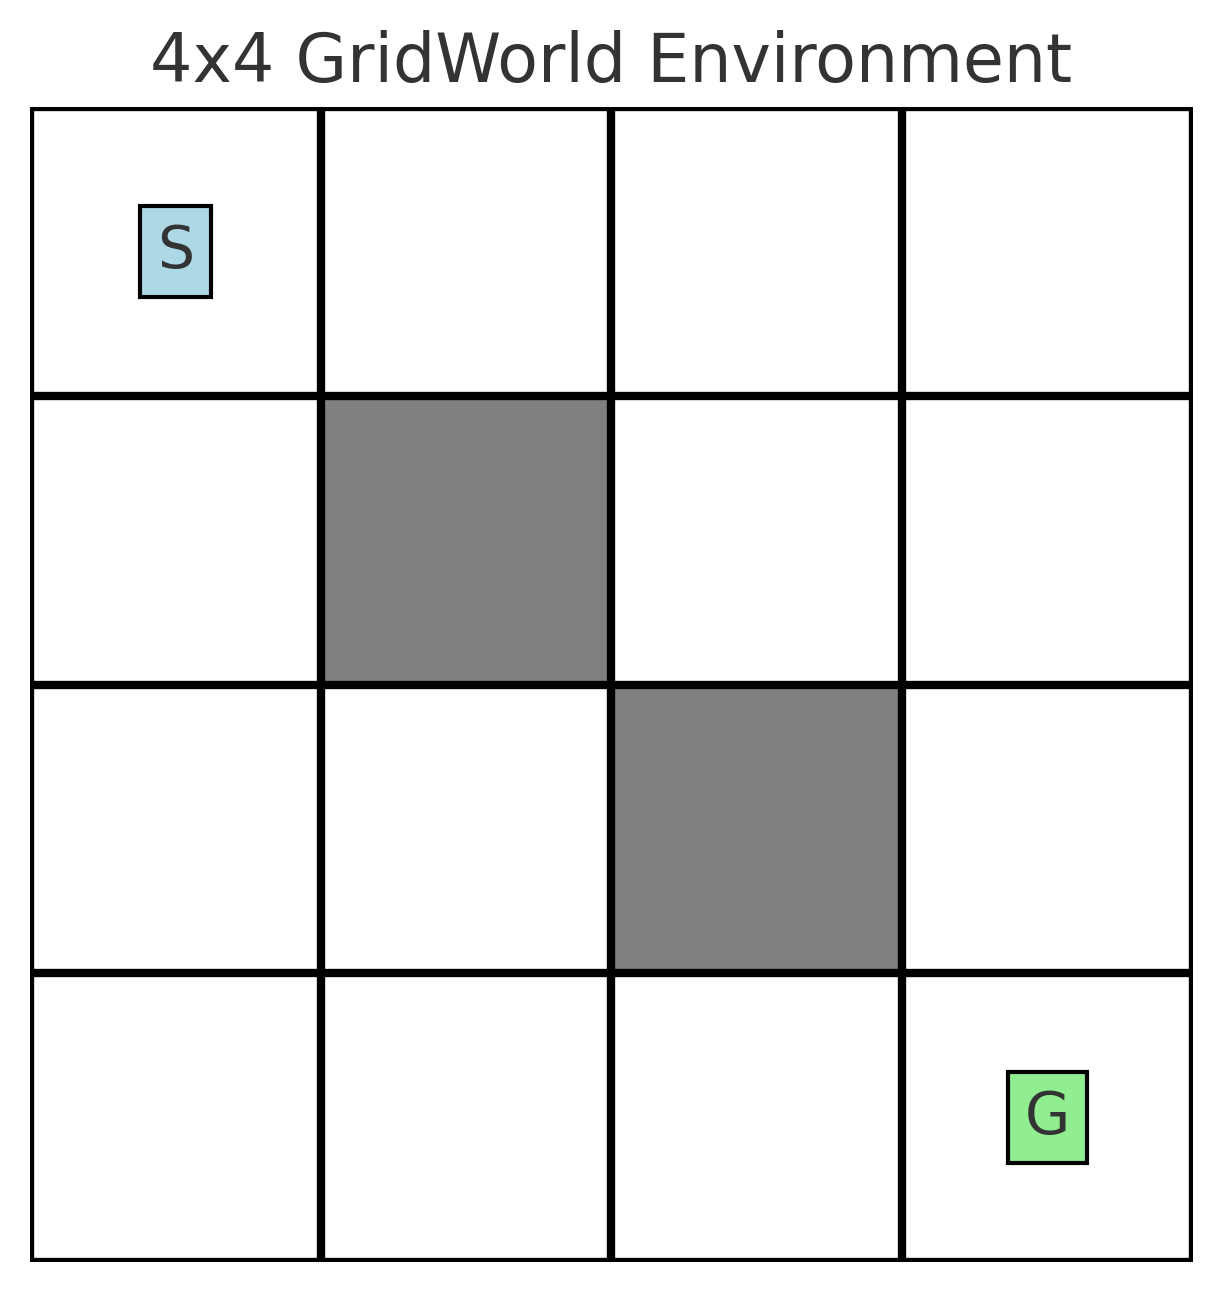

- **State Space ($ S $)**: The set of all possible states the agent can be in.
- **Action Space ($ A $)**: The set of all possible actions the agent can take.
- **Reward Function ($ R $)**: The reward the agent receives for taking an action in a given state.
- **Transition Probability ($ P $)**: The probability of transitioning to a new state given the current state and action. If the environment is deterministic, this can be omitted.

After defining the MDP components, implement problem using the **Gymnasium standard API**. Then, test the environments using various reinforcement learning algorithms (e.g., Q-Learning, DQN, PPO) and evaluate their performance.

In [ ]:
import gymnasium as gym
from gymnasium import spaces
import numpy as np
from typing import Any, SupportsFloat, Tuple, Dict

class YourAwesomeEnvironment(gym.Env):
    def __init__(self) -> None:
        super().__init__()
        self.action_space = spaces.Discrete(4)
        self.observation_space = spaces.Box(low=np.array([0, 0]), high=np.array([3, 3]), dtype=int)
        self.grid_size = 4
        self.start_pos = (0, 0)
        self.goal_pos = (3, 3)
        self.blocked_positions = [(1, 1), (2, 2)]
        self.state = self.start_pos
        self.max_steps = 200
        self.current_steps = 0
        self.prev_dist = None

    def step(
        self, action: Any
    ) -> tuple[Any, SupportsFloat, bool, bool, dict[str, Any]]:
        x, y = self.state

        if action == 0:
            x = max(x - 1, 0)
        elif action == 1:
            x = min(x + 1, self.grid_size - 1)
        elif action == 2:
            y = max(y - 1, 0)
        elif action == 3:
            y = min(y + 1, self.grid_size - 1)

        if (x, y) in self.blocked_positions:
            x, y = self.state

        self.state = (x, y)
        terminated = (x, y) == self.goal_pos
        self.current_steps += 1  # Track steps
        truncated = self.current_steps >= self.max_steps  # Auto-truncate

        goal_dist = abs(x - self.goal_pos[0]) + abs(y - self.goal_pos[1])

        reward = -0.1  # Penalize long paths
        if self.prev_dist is not None:
            progress_bonus = 0.5 * (self.prev_dist - goal_dist)
            reward += progress_bonus

        if terminated:
            reward += 10.0  # Large success bonus
        self.prev_dist = goal_dist

        info = {}

        return np.array(self.state, dtype=int), reward, terminated, truncated, info

    def reset(
        self, *, seed: int | None = None, options: dict[str, Any] | None = None
    ) -> tuple[Any, dict[str, Any]]:

        self.state = self.start_pos
        self.current_steps = 0  # Reset counter


        return np.array(self.state, dtype=int), {}

    def render(self):
        grid = np.zeros((self.grid_size, self.grid_size), dtype=str)
        grid[self.start_pos] = "S"
        grid[self.goal_pos] = "G"
        for pos in self.blocked_positions:
            grid[pos] = "X"
        grid[self.state] = "P"

        print("Grid World:")
        print(grid)
        print()

    def close(self):
        print("Environment closed.")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from stable_baselines3 import PPO, DQN
from stable_baselines3.common.callbacks import BaseCallback

TOTAL_TIMESTEPS = 30000
EVAL_EPISODES = 100

class TrainingMetricsCallback(BaseCallback):
    def __init__(self, verbose=0):
        super().__init__(verbose)
        self.episode_rewards = []
        self.episode_lengths = []
        self.current_ep_reward = 0
        self.current_ep_length = 0

    def _on_step(self) -> bool:
        reward = self.locals["rewards"][0]
        done = self.locals["dones"][0]

        self.current_ep_reward += reward
        self.current_ep_length += 1

        if done:
            self.episode_rewards.append(self.current_ep_reward)
            self.episode_lengths.append(self.current_ep_length)
            self.current_ep_reward = 0
            self.current_ep_length = 0

        return True

def train_model(model_class, env, timesteps=TOTAL_TIMESTEPS):
    callback = TrainingMetricsCallback()
    model = model_class("MlpPolicy", env, verbose=0)
    model.learn(total_timesteps=timesteps, callback=callback)
    return model, callback.episode_rewards, callback.episode_lengths

# def evaluate_model(model, env, n_episodes=EVAL_EPISODES):
#     success_count = 0
#     episode_lengths = []

#     for _ in range(n_episodes):
#         obs, _ = env.reset()
#         terminated = False
#         truncated = False
#         steps = 0

#         while not (terminated or truncated):
#             action, _ = model.predict(obs, deterministic=True)
#             obs, reward, terminated, truncated, _ = env.step(action)
#             steps += 1

#             if terminated:
#                 success_count += 1

#         episode_lengths.append(steps)

#     success_rate = success_count / n_episodes
#     avg_length = np.mean(episode_lengths)
#     return success_rate, avg_length

def evaluate_model(model, env, n_episodes=EVAL_EPISODES):
    success_count = 0
    episode_lengths = []

    for _ in range(n_episodes):
        obs, _ = env.reset()
        total_reward = 0
        steps = 0

        while True:
            action, _ = model.predict(obs, deterministic=True)
            obs, reward, terminated, truncated, _ = env.step(action)
            steps += 1
            total_reward += reward

            if terminated or truncated:
                if terminated:
                    success_count += 1
                episode_lengths.append(steps)
                break

    success_rate = success_count / n_episodes
    avg_length = np.mean(episode_lengths)
    return success_rate, avg_length

def plot_learning_curves(ppo_rewards, dqn_rewards, ppo_lengths, dqn_lengths):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(ppo_rewards, label='PPO')
    plt.plot(dqn_rewards, label='DQN')
    plt.xlabel('Episode')
    plt.ylabel('Episode Reward')
    plt.title('Training Reward Progress')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(ppo_lengths, label='PPO')
    plt.plot(dqn_lengths, label='DQN')
    plt.xlabel('Episode')
    plt.ylabel('Episode Length')
    plt.title('Training Episode Length Progress')
    plt.legend()

    plt.tight_layout()
    plt.show()

def visualize_agent(model, env):
    obs, _ = env.reset()
    terminated = False
    truncated = False
    path = [obs.copy()]

    print("Agent's path:")
    # env.render()

    while not (terminated or truncated):
        action, _ = model.predict(obs, deterministic=True)
        obs, _, terminated, truncated, _ = env.step(action)
        path.append(obs.copy())
        # env.render()

    print(f"Final path coordinates: {path}")

env = YourAwesomeEnvironment()

print("Training PPO...")
ppo_model, ppo_rewards, ppo_lengths = train_model(PPO, env)

print("\nTraining DQN...")
dqn_model, dqn_rewards, dqn_lengths = train_model(DQN, env)

📊 Algorithm Comparison
Compare RL algorithms (e.g., PPO, DQN) based on:
- Total reward over time
- Sample efficiency
- Hyperparameters


In [ ]:
ppo_success, ppo_avg_length = evaluate_model(ppo_model, env)
dqn_success, dqn_avg_length = evaluate_model(dqn_model, env)

plot_learning_curves(ppo_rewards, dqn_rewards, ppo_lengths, dqn_lengths)

print("\nPerformance Metrics:")
print(f"PPO Success Rate: {ppo_success:.2%}")
print(f"DQN Success Rate: {dqn_success:.2%}")
print(f"\nPPO Average Episode Length: {ppo_avg_length:.2f} steps")
print(f"DQN Average Episode Length: {dqn_avg_length:.2f} steps")

print("\nVisualizing PPO agent:")
visualize_agent(ppo_model, env)

print("\nVisualizing DQN agent:")
visualize_agent(dqn_model, env)

env.close()

# **Task 3: Pygame 🎮 Tutorial & Custom RL Environment (Bonus)**

In this bonus task, you will implement a custom RL environment using Pygame and make it Gym-compatible for training an RL agent. Pygame is widely used for 2D game development and can be an excellent tool for creating custom RL environments. You will start by learning basic Pygame concepts (game loop, rendering, input handling), then implement a simple grid-based environment where an agent moves toward a goal while avoiding obstacles. Finally, you will train an RL agent using Stable-Baselines3 (SB3) to solve the environment. If you’re looking for inspiration, consider recreating the Chrome Dino game 🦖 as an RL environment which will be introduced at workshop or future TA sessions, but feel free to explore your own ideas!

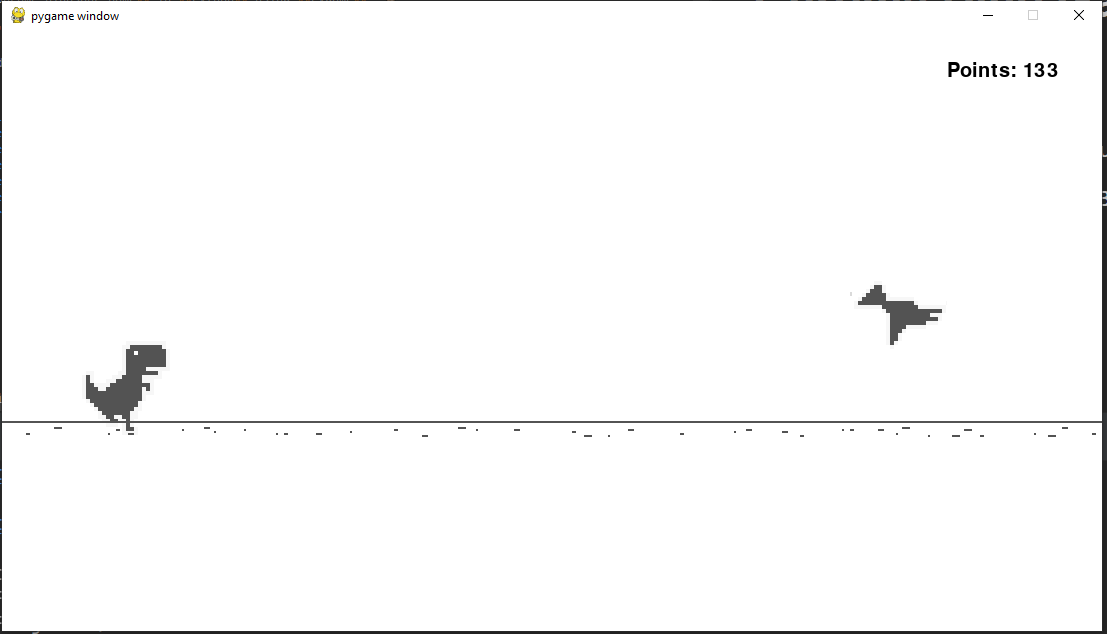

In [ ]:
import pygame
import gymnasium as gym
from gymnasium import spaces
import numpy as np
from stable_baselines3 import PPO
from stable_baselines3.common.callbacks import BaseCallback
from stable_baselines3.common.vec_env import DummyVecEnv
import matplotlib.pyplot as plt


GRID_SIZE = 5
CELL_SIZE = 60
SCREEN_SIZE = GRID_SIZE * CELL_SIZE
WHITE = (255, 255, 255)
BLACK = (0, 0, 0)
GREEN = (0, 255, 0)
RED = (255, 0, 0)
BLUE = (0, 0, 255)

class GridWorldEnv(gym.Env):
    metadata = {'render.modes': ['human', 'rgb_array']}

    def __init__(self):
        super(GridWorldEnv, self).__init__()
        self.action_space = spaces.Discrete(4)
        self.observation_space = spaces.Box(
            low=0, high=GRID_SIZE-1, shape=(4,), dtype=np.int32
        )

        pygame.init()
        self.screen = pygame.display.set_mode((SCREEN_SIZE, SCREEN_SIZE))
        self.clock = pygame.time.Clock()

        self.agent_pos = None
        self.goal_pos = None
        self.obstacles = []
        self.max_steps = 100
        self.current_step = 0

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        self.agent_pos = np.array([0, 0])
        self.goal_pos = np.array([GRID_SIZE-1, GRID_SIZE-1])
        self.obstacles = [(2, 1), (1, 3), (3, 2)]
        self.current_step = 0
        return self._get_obs(), {}

    def step(self, action):
        self.current_step += 1
        new_pos = np.copy(self.agent_pos)

        if action == 0:
            new_pos[0] = max(0, new_pos[0] - 1)
        elif action == 1:
            new_pos[0] = min(GRID_SIZE-1, new_pos[0] + 1)
        elif action == 2:
            new_pos[1] = max(0, new_pos[1] - 1)
        elif action == 3:
            new_pos[1] = min(GRID_SIZE-1, new_pos[1] + 1)

        terminated = False
        truncated = False
        reward = -0.1

        if tuple(new_pos) in self.obstacles:
            reward = -10
            terminated = True
        else:
            self.agent_pos = new_pos

        if np.array_equal(self.agent_pos, self.goal_pos):
            reward = 10
            terminated = True

        if self.current_step >= self.max_steps:
            truncated = True

        return self._get_obs(), reward, terminated, truncated, {}

    def _get_obs(self):
        return np.concatenate((self.agent_pos, self.goal_pos))

    def render(self, mode='human'):
        self.screen.fill(WHITE)

        for x in range(GRID_SIZE):
            for y in range(GRID_SIZE):
                rect = pygame.Rect(y*CELL_SIZE, x*CELL_SIZE, CELL_SIZE, CELL_SIZE)
                pygame.draw.rect(self.screen, BLACK, rect, 1)

        pygame.draw.circle(self.screen, BLUE,
                          (int((self.agent_pos[1]+0.5)*CELL_SIZE),
                          int((self.agent_pos[0]+0.5)*CELL_SIZE)),
                          CELL_SIZE//3)

        pygame.draw.rect(self.screen, GREEN,
                        (self.goal_pos[1]*CELL_SIZE, self.goal_pos[0]*CELL_SIZE,
                         CELL_SIZE, CELL_SIZE))

        for obs in self.obstacles:
            pygame.draw.rect(self.screen, RED,
                            (obs[1]*CELL_SIZE, obs[0]*CELL_SIZE,
                             CELL_SIZE, CELL_SIZE))

        if mode == 'human':
            pygame.display.flip()
            self.clock.tick(10)
        elif mode == 'rgb_array':
            return pygame.surfarray.array3d(self.screen)

    def close(self):
        pygame.quit()


class TrainingCallback(BaseCallback):
    def __init__(self, check_freq=1000):
        super().__init__()
        self.check_freq = check_freq
        self.successes = []

    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            success_rate = self._evaluate()
            self.successes.append(success_rate)
            print(f"Step: {self.num_timesteps}, Success Rate: {success_rate:.2f}")
        return True

    def _evaluate(self, n_episodes=10):
        env = self.training_env.envs[0]
        successes = 0

        for _ in range(n_episodes):
            obs = env.reset()
            done = False
            while not done:
                action, _ = self.model.predict(obs)
                obs, _, done, _ = env.step(action)
                if np.array_equal(obs[:2], obs[2:]):
                    successes += 1
                    break
        return successes / n_episodes


TOTAL_TIMESTEPS = 100_000

env = DummyVecEnv([lambda: GridWorldEnv()])

model = PPO("MlpPolicy", env, verbose=1,
           learning_rate=3e-4,
           n_steps=2048,
           batch_size=64,
           gamma=0.99)

callback = TrainingCallback()
model.learn(total_timesteps=TOTAL_TIMESTEPS, callback=callback)

plt.plot(callback.successes)
plt.xlabel("Evaluation Points")
plt.ylabel("Success Rate")
plt.title("Training Progress")
plt.show()

model.save("gridworld_ppo")

obs = env.reset()
done = False
while not done:
    action, _ = model.predict(obs)
    obs, _, done, _ = env.step(action)
    env.render()
    pygame.time.wait(200)

env.close()